In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directory containing your images
data_dir = "C:/Users/madda/Downloads/face recognition cnn/data"


# Image dimensions
img_height = 200
img_width = 200

# List of classes (faces)
classes = ["Hima", "Tony", "Markram"]

# Initialize lists to store images and labels
images = []
labels = []

# Load images and assign labels
for class_name in classes:
    for i in range(1, 201):
        img_name = f"{class_name}{i}.jpg"
        img_path = os.path.join(data_dir, img_name)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(classes.index(class_name))

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.summary()


E:\anacondapython\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,760,899 (33.42 MB)

 Trainable params: 8,760,899 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 588ms/step - accuracy: 0.7231 - loss: 0.5313 - val_accuracy: 1.0000 - val_loss: 1.6764e-08
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 548ms/step - accuracy: 0.9969 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 560ms/step - accuracy: 0.9952 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 544ms/step - accuracy: 0.9982 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 573ms/step - accuracy: 1.0000 - loss: 4.9466e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 568ms/step - accuracy: 1.0000 - loss: 4.2035e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 541ms/step - accuracy: 0.9954 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 535ms/step - accuracy: 0.

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 1.0000 - loss: 9.9341e-10
Test accuracy: 1.0


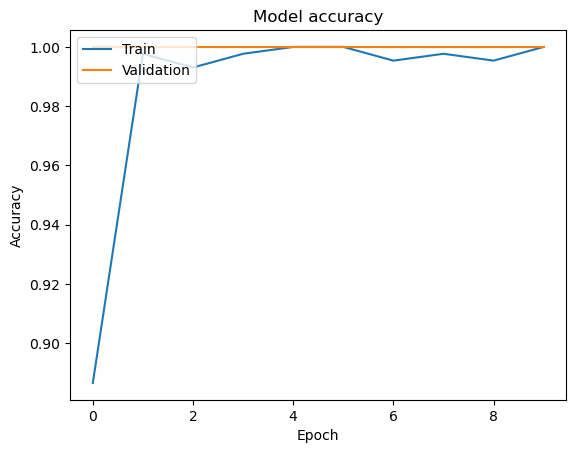

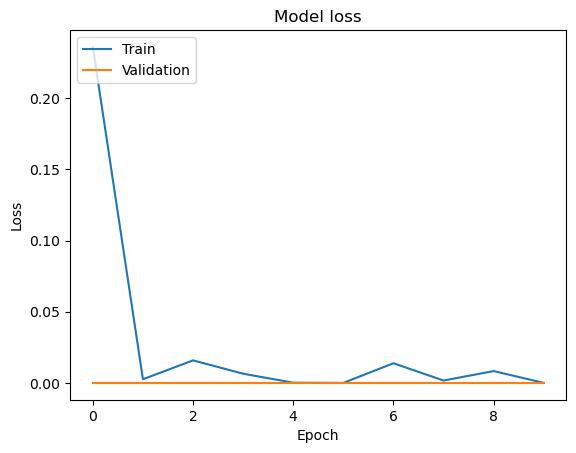

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


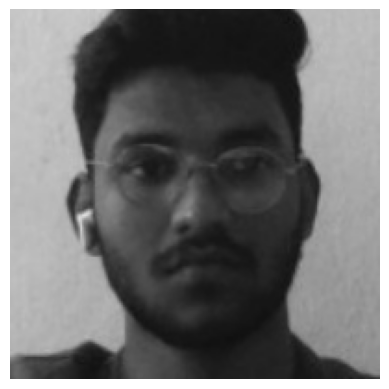

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted class: Hima


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array, img

# Path to the image you want to predict
image_path = r"C:\Users\madda\Downloads\face recognition cnn\data\Hima95.jpg"

# Load and preprocess the image
input_image, img = load_and_preprocess_image(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions
predictions = model.predict(input_image)

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])
predicted_class = classes[predicted_class_index]

print("Predicted class:", predicted_class)
